In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
# Load the Data
data = pd.read_csv('../input/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Drop unreleated columns
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [5]:
# Count all the nan values
print(data.isna().sum())
data.head()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
# Now, the Cabin column (which has highest number of NaN values) is a useless feature as many passengers tend to have multiple cabins. Dropping this feature will help us highly
data.drop('Cabin', axis=1, inplace=True)

In [7]:
def generate_data_stats(data):
    print(data.head())
    print(data.isna().sum())

In [8]:
generate_data_stats(data)

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


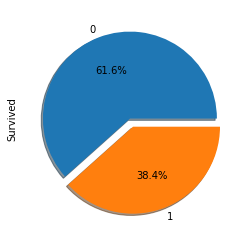

In [9]:
# Let's see how many survived
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',shadow=True)

In [10]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
def get_cat_names(data, column_name):
    dct = dict(data[column_name].value_counts())
    
    lst = list(dct.keys())
    
    return lst


def encode_labels(data, column_name, distinct_vals):
    copy = data.copy(deep=True)
    
    copy[column_name].replace(distinct_vals, [x for x in range(len(distinct_vals))], inplace=True)
    
    return copy

def LabelEncoder(data, column_name):
    dct = dict(data[column_name].value_counts())
    
    lst = list(dct.keys())
    
    copy = data.copy(deep=True)
    
    copy[column_name].replace(lst, [x for x in range(len(lst))], inplace=True)
    
    return copy

In [12]:
data = LabelEncoder(data, 'Embarked')

In [13]:
data = LabelEncoder(data, 'Sex')

In [14]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [15]:
data.dropna(inplace=True)

In [16]:
target = data['Survived'].values
feature = data.drop('Survived', axis=1).values

In [17]:
# Reshape the target dependent variable
target = target.reshape(-1, 1)

In [18]:
# Let's make the neural network in Tensorflow using core tensorflow computations

X = tf.placeholder(dtype=tf.float32, shape=[None, 7])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

# Hyperparamters
# learning_rate = 0.001
hl_1n = 20
# hl_2n = 8
# hl_3n = 10
# hl_4n = 8
# ol_n = 1

# Let's initialize weights
hidden_1_w = tf.Variable(tf.random_normal(shape=[7, hl_1n]))
# hidden_2_w = tf.Variable(tf.random_normal(shape=[hl_1n, hl_2n]))
# hidden_3_w = tf.Variable(tf.random_normal(shape=[hl_2n, hl_3n]))
# hidden_4_w = tf.Variable(tf.random_normal(shape=[hl_3n, hl_4n]))
output_w = tf.Variable(tf.random_normal(shape=[hl_1n, ol_n]))

# And let's initialize biases
hidden_1_b = tf.Variable(tf.random_normal(shape=[hl_1n]))
# hidden_2_b = tf.Variable(tf.random_normal(shape=[hl_2n]))
# hidden_3_b = tf.Variable(tf.random_normal(shape=[hl_3n]))
# hidden_4_b = tf.Variable(tf.random_normal(shape=[hl_4n]))
output_b = tf.Variable(tf.random_normal(shape=[ol_n]))

NameError: name 'ol_n' is not defined

In [19]:
# Let's make the Computation Graph
hidden_1_out = tf.sigmoid(tf.add(tf.matmul(X, hidden_1_w), hidden_1_b))
# hidden_2_out = tf.sigmoid(tf.add(tf.matmul(hidden_1_out, hidden_2_w), hidden_2_b))
# hidden_3_out = tf.sigmoid(tf.add(tf.matmul(hidden_2_out, hidden_3_w), hidden_3_b))
# hidden_4_out = tf.sigmoid(tf.add(tf.matmul(hidden_3_out, hidden_4_w), hidden_4_b))
out = tf.add(tf.matmul(hidden_1_out, output_w), output_b)

NameError: name 'hidden_1_b' is not defined

In [20]:
cost = tf.reduce_mean(tf.square(out - y))

NameError: name 'out' is not defined

In [21]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.003)
min_err = optimizer.minimize(cost)

NameError: name 'cost' is not defined

In [22]:
init = tf.global_variables_initializer()

In [23]:
costs = list()
with tf.Session() as sess:
    sess.run(init)
    total_epochs = 10000
    for epoch in range(total_epochs):
        f_dict = {X: feature, y:target}
        
        sess.run(min_err, feed_dict=f_dict)
        
        current_cost = sess.run(cost, feed_dict=f_dict)
        
        costs.append(current_cost)
        
        print("The Cost at epoch: %i is: %f" %(epoch, current_cost))

NameError: name 'min_err' is not defined

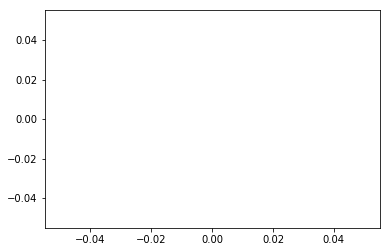

In [24]:
plt.plot(costs)